In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
#df = df1.sample(frac=0.6, random_state=42)

In [3]:
df.sample(5)

,id,title,author,text,label
10729,10729,University of Washington Tacoma Declares Prope...,Tom Ciccotta,The Writing Center at the University of Washin...,0
9647,9647,World’s Oldest Fossils Found in Greenland - Th...,Nicholas Wade,Geologists have discovered in Greenland eviden...,0
10525,10525,"Abducted at Birth and Found 18 Years Later, Wo...",Frances Robles,MIAMI — Alexis K. Manigo closes her eyes to...,0
19910,19910,"Iceland’s Prime Minister Resigns, After Pirate...",Kimiko de Freytas-Tamura,"REYKJAVIK, Iceland — Iceland’s prime minist...",0
664,664,The Billionaire Who’s Building a Davos of His ...,Alessandra Stanley,"In a conference room at Stanford University,...",0


In [4]:
df.shape

(20800, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
#df.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Data Cleaning

In [8]:
#missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
#df = df.dropna(subset=df.columns)
df = df.fillna('')

In [10]:
#df['title'][48567]

In [11]:
df.rename(columns = {'label':'target', 'text':'body'},inplace = True)
df.sample(5)

,id,title,author,body,target
15403,15403,What to Cook This Week - The New York Times,Sam Sifton,Sam Sifton emails readers of Cooking five days...,0
19413,19413,TRUNEWS 11/04/16 Spirit Cooking: Will America ...,,TRUNEWS 11/04/16 Spirit Cooking: Will America ...,1
20636,20636,,Dave Lowery,Trump all the way!,1
18474,18474,JUST AS YOU EXPECTED: Southern Poverty Law Cen...,BareNakedIslam,BNI Store Nov 3 2016 JUST AS YOU EXPECTED: Sou...,1
3752,3752,Страны БРИКС дают отпор Соединенным Штатам в ф...,Ариэль Нойола Родригес,Страны БРИКС дают отпор Соединенным Штатам в ф...,1


In [12]:
df.rename(columns = {'title':'text'},inplace = True)
df.sample(5)

,id,text,author,body,target
13060,13060,UK Doctors Create List of Procedures You Don’t...,Fiona Miller,UK Doctors Create List of Procedures You Don’t...,1
14561,14561,Courts to Determine Lakers’ Fate in Buss Sibli...,Michelle Moons,The children of late Los Angeles Lakers owner ...,0
9041,9041,POTUS FLOTUS Pocus,Lloyd Billingsley,The president and Hillary Clinton share a “stu...,1
6522,6522,France Eases Rules for Police to Carry Guns Wh...,Alissa J. Rubin,PARIS — France eased its gun rules on Wedne...,0
10856,10856,"Italy’s Premier, Matteo Renzi, Says He’ll Resi...",Jason Horowitz,ROME — Italy plunged into political and eco...,0


In [13]:
df['content'] = df['author']+' '+df['text']
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

id         0
text       0
author     0
body       0
target     0
content    0
dtype: int64

## EDA

In [18]:
df['target'].value_counts()

target
1    10413
0    10387
Name: count, dtype: int64

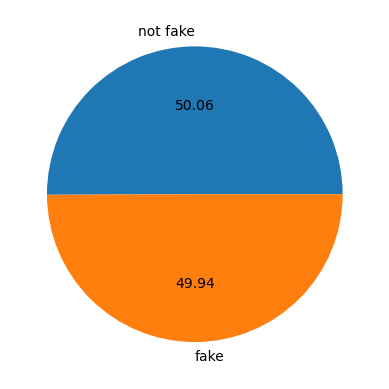

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['not fake', 'fake'], autopct = "%0.2f")
plt.show()

In [20]:
import nltk

#### Feature Engineering

In [21]:
#number of characters
df['content'].apply(len)

0         95
1         71
2         52
3         79
4        108
        ... 
20795     69
20796     82
20797    122
20798     62
20799     39
Name: content, Length: 20800, dtype: int64

In [22]:
df['num_characters'] = df['content'].apply(len)
df.sample(5)

,id,text,author,body,target,content,num_characters
18658,18658,What Happens If Trump Refuses To Concede Elect...,,Hillary Clinton Waiting In Wings Of Stage Sinc...,1,What Happens If Trump Refuses To Concede Elec...,93
9735,9735,"A Government of Scoundrels, Spies, Thieves, Ru...",noreply@blogger.com (Alexander Light),". A Government of Scoundrels, Spies, Thieves, ...",1,noreply@blogger.com (Alexander Light) A Govern...,111
3954,3954,British Airways Computer Problems Cause Widesp...,Nicola Clark and Liam Stack,British Airways said its flights were graduall...,0,Nicola Clark and Liam Stack British Airways Co...,106
16785,16785,Facebook to Stop ’Fake News’ Same Way as ’Clic...,Charlie Nash,Facebook will stop “fake news” using a similar...,0,Charlie Nash Facebook to Stop ’Fake News’ Same...,92
18064,18064,UFO over the East Valley here in AZ last night.,PraetorianAZ,UFO over the East Valley here in AZ last night...,1,PraetorianAZ UFO over the East Valley here in ...,60


In [23]:
#number of words
df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

0        21
1        14
2         8
3        12
4        16
         ..
20795    15
20796    16
20797    27
20798    11
20799     7
Name: content, Length: 20800, dtype: int64

In [24]:
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,id,text,author,body,target,content,num_characters,num_words
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,95,21
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",71,14
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,52,8
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,79,12
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,108,16


In [25]:
#number of sentences
df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

0        1
1        1
2        1
3        1
4        1
        ..
20795    2
20796    2
20797    1
20798    1
20799    1
Name: content, Length: 20800, dtype: int64

In [26]:
df['content'].apply(lambda x:len(nltk.sent_tokenize(x))).value_counts()

content
1    18962
2     1541
3      254
4       38
5        3
7        2
Name: count, dtype: int64

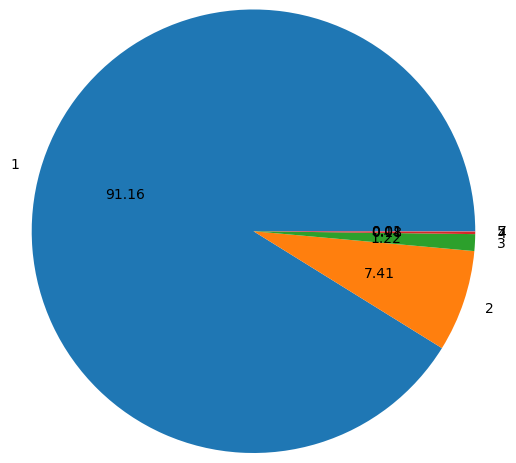

In [27]:
plt.pie(df['content'].apply(lambda x:len(nltk.sent_tokenize(x))).value_counts(), labels = ['1', '2', '3', '4', '5', '7'], autopct = "%0.2f", radius = 1.5)
plt.show()

In [28]:
df['num_sentences'] = df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.tail()

,id,text,author,body,target,content,num_characters,num_words,num_sentences
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,69,15,2
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",82,16,2
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...,122,27,1
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer...",62,11,1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,David Swanson What Keeps the F-35 Alive,39,7,1


In [30]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20800.000000,20800.000000,20800.000000
mean,87.231202,16.030385,1.105144
std,29.645591,6.016152,0.366190
min,3.000000,1.000000,1.000000
25%,71.000000,12.000000,1.000000
50%,89.000000,16.000000,1.000000
75%,104.000000,20.000000,1.000000
max,489.000000,85.000000,7.000000


In [31]:
#for non fake news
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10387.000000,10387.000000,10387.000000
mean,97.299316,18.302205,1.116588
std,18.773648,4.105793,0.395650
min,31.000000,7.000000,1.000000
25%,85.000000,16.000000,1.000000
50%,97.000000,18.000000,1.000000
75%,109.000000,21.000000,1.000000
max,197.000000,37.000000,5.000000


In [32]:
#for fake news
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10413.000000,10413.000000,10413.000000
mean,77.188226,13.764237,1.093729
std,34.670557,6.723179,0.333856
min,3.000000,1.000000,1.000000
25%,57.000000,10.000000,1.000000
50%,76.000000,13.000000,1.000000
75%,96.000000,17.000000,1.000000
max,489.000000,85.000000,7.000000


In [33]:
import seaborn as sns

In [34]:
df[df['target'] == 0]['num_characters']

1         71
5        140
7        103
8        105
9        122
        ... 
20792     81
20794     89
20795     69
20796     82
20797    122
Name: num_characters, Length: 10387, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

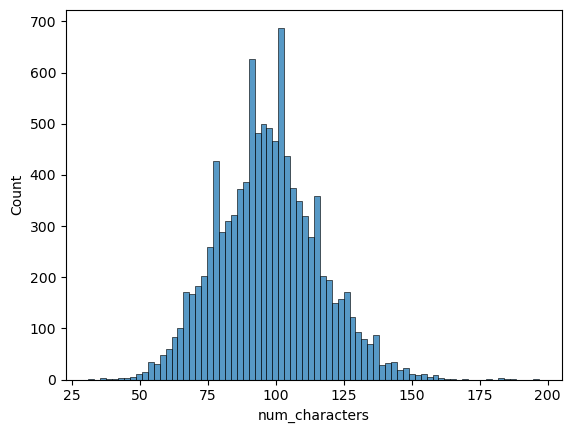

In [35]:
sns.histplot(df[df['target'] == 0]['num_characters'])

In [36]:
df[df['target'] == 1]['num_characters']

0         95
2         52
3         79
4        108
6        111
        ... 
20788    104
20791     89
20793     82
20798     62
20799     39
Name: num_characters, Length: 10413, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

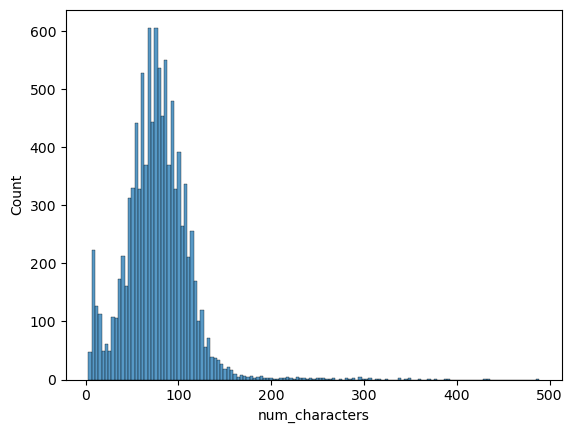

In [37]:
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

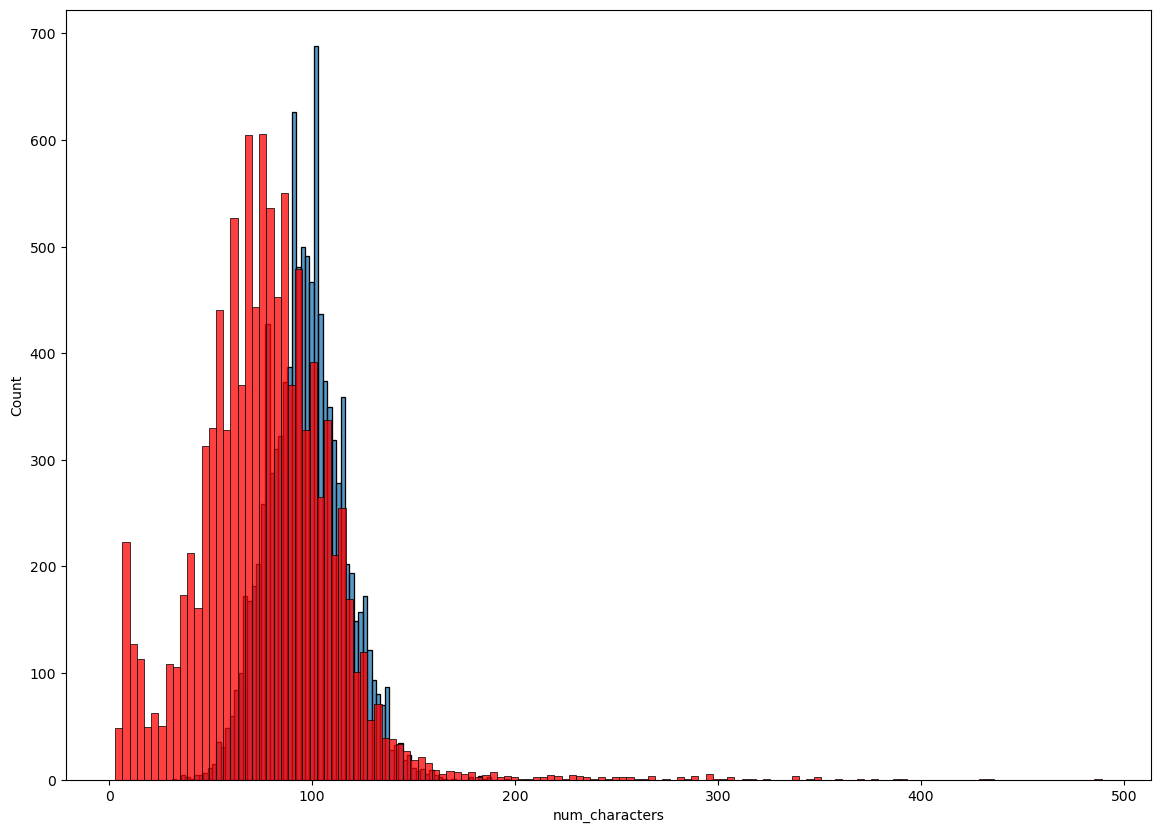

In [38]:
plt.figure(figsize = (14,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

C:\Users\RAJARSHI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


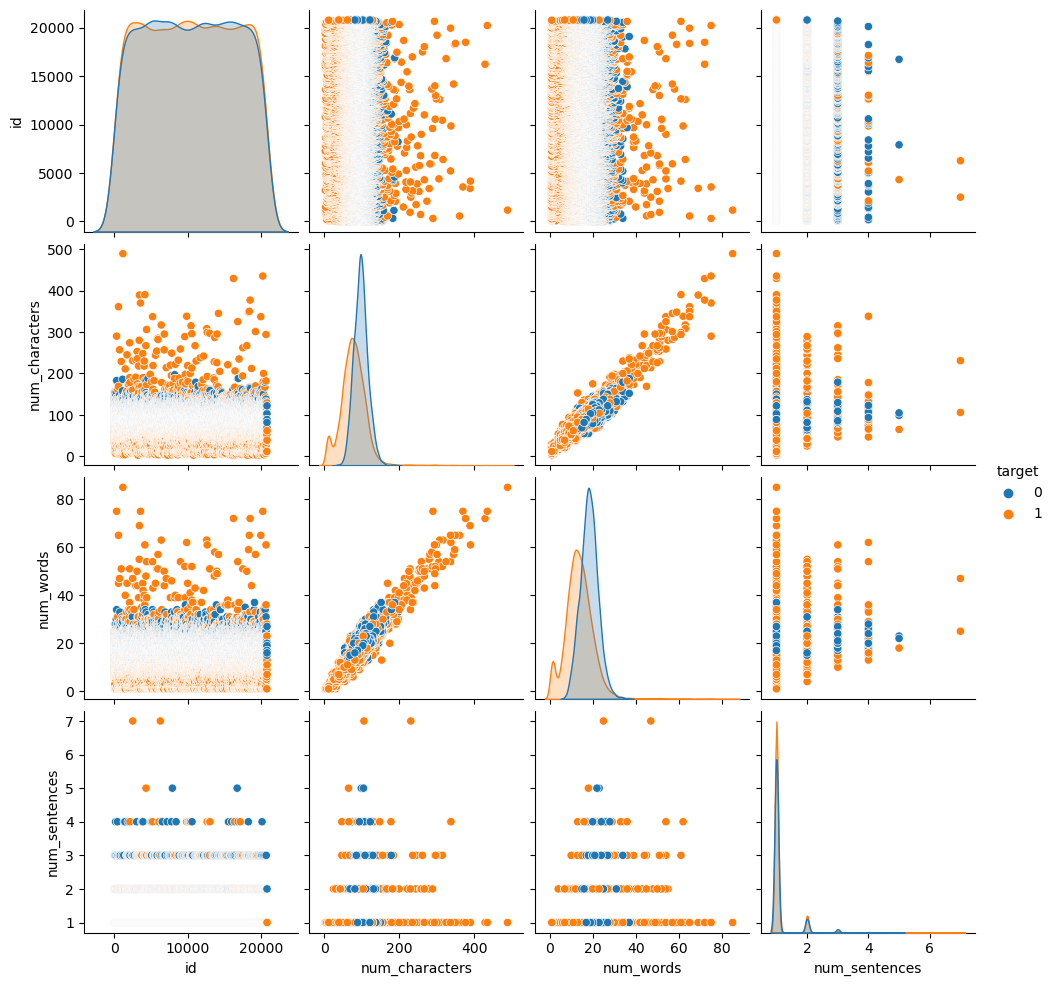

In [39]:
sns.pairplot(df, hue = 'target')

In [40]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,-0.339200,-0.377157,-0.031213
num_characters,-0.339200,1.000000,0.924791,0.127047
num_words,-0.377157,0.924791,1.000000,0.199548
num_sentences,-0.031213,0.127047,0.199548,1.000000


<Axes: >

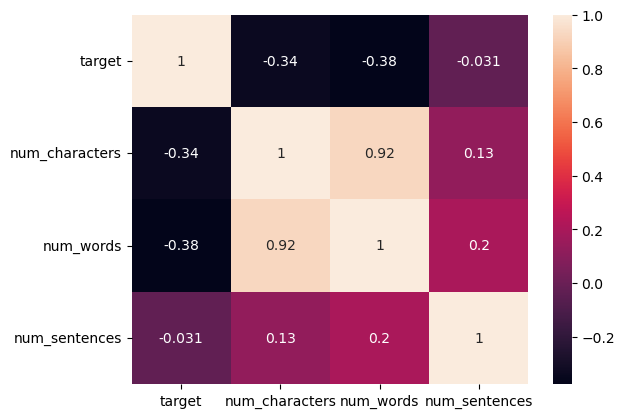

In [41]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(), annot = True)

## Data Preprocessing

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJARSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]  #clone the list y
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
#df['text'][15468]

In [49]:
transform_text(" White House Says It’s Releasing Hillary’s Private Concession Call To Trump In Bid To Humiliate Her")

'white hous say releas hillari privat concess call trump bid humili'

In [50]:
##df['text'].apply(transform_text)

In [51]:
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [52]:
df['transformed_text'] = df['content'].apply(transform_text)
df.tail()

,id,text,author,body,target,content,num_characters,num_words,num_sentences,transformed_text
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,69,15,2,jerom hudson rapper trump poster child white s...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",82,16,2,benjamin hoffman playoff schedul matchup odd n...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...,122,27,1,michael de la merc rachel abram maci said rece...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer...",62,11,1,alex ansari nato russia hold parallel exercis ...
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,David Swanson What Keeps the F-35 Alive,39,7,1,david swanson keep aliv


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
df[df['target'] == 1]['transformed_text']

0        darrel lucu hous dem aid even see comey letter...
2                                     truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
6        life life luxuri elton john 6 favorit shark pi...
                               ...                        
20788    joe clark main gov lepag threaten investig col...
20791    daniel greenfield lawyer kept hillari campaign...
20793    robert rich idiot destroy trump hollywood star...
20798    alex ansari nato russia hold parallel exercis ...
20799                              david swanson keep aliv
Name: transformed_text, Length: 10413, dtype: object

In [55]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [56]:
fake_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

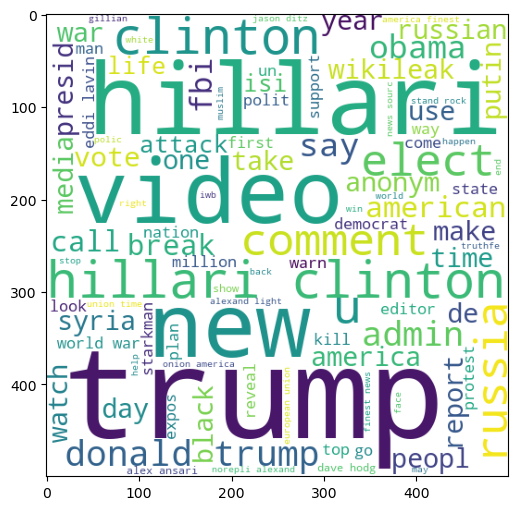

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(fake_wc)

In [58]:
not_fake_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

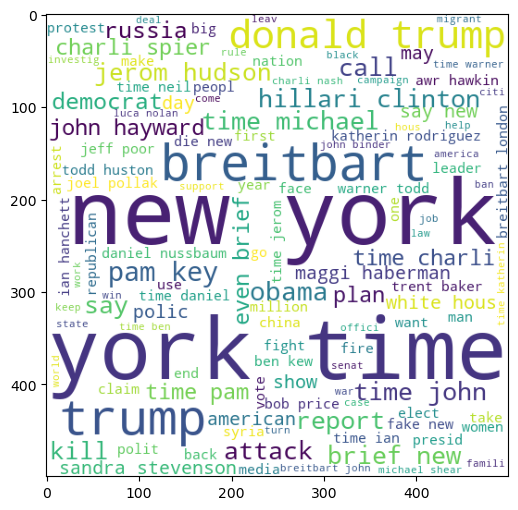

In [59]:
plt.figure(figsize=(12,6))
plt.imshow(not_fake_wc)

In [60]:
df.head()

,id,text,author,body,target,content,num_characters,num_words,num_sentences,transformed_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,95,21,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",71,14,1,daniel flynn flynn hillari clinton big woman c...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,52,8,1,truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,79,12,1,jessica purkiss 15 civilian kill singl us airs...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,108,16,1,howard portnoy iranian woman jail fiction unpu...


In [61]:
df[df['target'] == 1]['transformed_text'].tolist()

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
 'truth might get fire',
 'jessica purkiss 15 civilian kill singl us airstrik identifi',
 'howard portnoy iranian woman jail fiction unpublish stori woman stone death adulteri',
 'life life luxuri elton john 6 favorit shark pictur stare long transcontinent flight',
 'amando flavio russian research discov secret nazi militari base treasur hunter arctic photo',
 'jason ditz us offici see link trump russia',
 'anotheranni ye paid govern troll social media blog forum websit',
 'starkman anonym donor pay million releas everyon arrest dakota access pipelin',
 'doc fbi close hillari',
 'news hope gop nude paul ryan emerg ayahuasca tent vision new republican parti',
 'massachusett cop wife bust pin fake robberi black live matter',
 'ira helfand nuke un histor treati ban nuclear weapon',
 'amanda shea humili hillari tri hide camera caught 15 min ralli',
 'israel becom pivot china calculu http',
 'greanfinish still danger zo

In [62]:
fake_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [63]:
len(fake_corpus)

90364

In [64]:
from collections import Counter
Counter(fake_corpus)

Counter({'trump': 1410,
         'hillari': 1030,
         'clinton': 961,
         'elect': 570,
         'news': 440,
         'new': 437,
         'us': 395,
         'video': 389,
         'war': 350,
         'world': 347,
         'fbi': 337,
         'comment': 336,
         'russia': 335,
         'norepli': 318,
         'email': 313,
         'america': 304,
         'vote': 300,
         'obama': 282,
         'admin': 276,
         'donald': 264,
         'time': 232,
         'say': 230,
         'american': 225,
         'break': 212,
         'day': 210,
         'presid': 197,
         'state': 197,
         'de': 195,
         'wikileak': 188,
         'campaign': 178,
         'support': 177,
         '2016': 176,
         'report': 172,
         'get': 170,
         'media': 168,
         'black': 167,
         'call': 162,
         'anonym': 160,
         'win': 160,
         'russian': 158,
         'protest': 154,
         'make': 150,
         'putin': 149,
     

In [65]:
Counter(fake_corpus).most_common(30)

[('trump', 1410),
 ('hillari', 1030),
 ('clinton', 961),
 ('elect', 570),
 ('news', 440),
 ('new', 437),
 ('us', 395),
 ('video', 389),
 ('war', 350),
 ('world', 347),
 ('fbi', 337),
 ('comment', 336),
 ('russia', 335),
 ('norepli', 318),
 ('email', 313),
 ('america', 304),
 ('vote', 300),
 ('obama', 282),
 ('admin', 276),
 ('donald', 264),
 ('time', 232),
 ('say', 230),
 ('american', 225),
 ('break', 212),
 ('day', 210),
 ('presid', 197),
 ('state', 197),
 ('de', 195),
 ('wikileak', 188),
 ('campaign', 178)]

In [66]:
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,trump,1410
1,hillari,1030
2,clinton,961
3,elect,570
4,news,440
5,new,437
6,us,395
7,video,389
8,war,350
9,world,347


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'trump'),
  Text(1, 0, 'hillari'),
  Text(2, 0, 'clinton'),
  Text(3, 0, 'elect'),
  Text(4, 0, 'news'),
  Text(5, 0, 'new'),
  Text(6, 0, 'us'),
  Text(7, 0, 'video'),
  Text(8, 0, 'war'),
  Text(9, 0, 'world'),
  Text(10, 0, 'fbi'),
  Text(11, 0, 'comment'),
  Text(12, 0, 'russia'),
  Text(13, 0, 'norepli'),
  Text(14, 0, 'email'),
  Text(15, 0, 'america'),
  Text(16, 0, 'vote'),
  Text(17, 0, 'obama'),
  Text(18, 0, 'admin'),
  Text(19, 0, 'donald'),
  Text(20, 0, 'time'),
  Text(21, 0, 'say'),
  Text(22, 0, 'american'),
  Text(23, 0, 'break'),
  Text(24, 0, 'day'),
  Text(25, 0, 'presid'),
  Text(26, 0, 'state'),
  Text(27, 0, 'de'),
  Text(28, 0, 'wikileak'),
  Text(29, 0, 'campaign')])

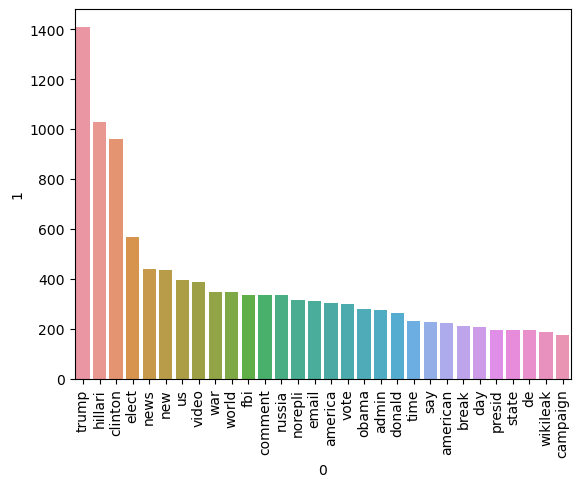

In [67]:
#seaborn only supports argument as x and y, so we have to name them properly
#we can't use barplot without x and y
sns.barplot(x = pd.DataFrame(Counter(fake_corpus).most_common(30))[0], y = pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [68]:
not_fake_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_fake_corpus.append(word)

In [69]:
pd.DataFrame(Counter(not_fake_corpus).most_common(30))

,0,1
0,new,6725
1,time,6411
2,york,6385
3,breitbart,2752
4,trump,2193
5,donald,638
6,michael,438
7,john,421
8,say,392
9,news,324


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'new'),
  Text(1, 0, 'time'),
  Text(2, 0, 'york'),
  Text(3, 0, 'breitbart'),
  Text(4, 0, 'trump'),
  Text(5, 0, 'donald'),
  Text(6, 0, 'michael'),
  Text(7, 0, 'john'),
  Text(8, 0, 'say'),
  Text(9, 0, 'news'),
  Text(10, 0, 'obama'),
  Text(11, 0, 'clinton'),
  Text(12, 0, 'charli'),
  Text(13, 0, 'key'),
  Text(14, 0, 'pam'),
  Text(15, 0, 'state'),
  Text(16, 0, 'attack'),
  Text(17, 0, 'presid'),
  Text(18, 0, 'report'),
  Text(19, 0, 'hous'),
  Text(20, 0, 'brief'),
  Text(21, 0, 'hillari'),
  Text(22, 0, 'daniel'),
  Text(23, 0, 'even'),
  Text(24, 0, 'bill'),
  Text(25, 0, 'white'),
  Text(26, 0, 'kill'),
  Text(27, 0, 'ian'),
  Text(28, 0, 'call'),
  Text(29, 0, 'plan')])

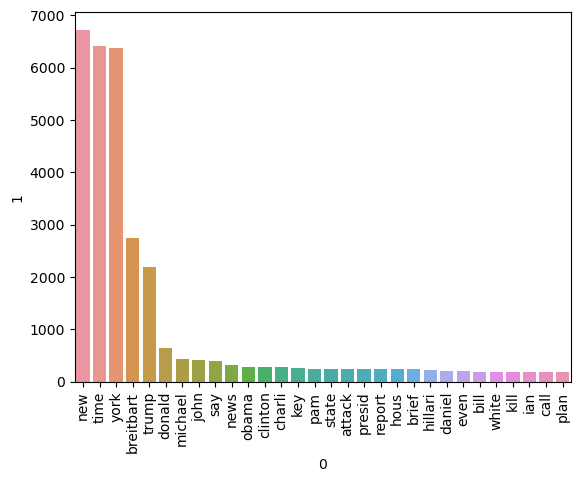

In [70]:
sns.barplot(x = pd.DataFrame(Counter(not_fake_corpus).most_common(30))[0], y = pd.DataFrame(Counter(not_fake_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

## Model Building

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer() #15000

In [72]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [73]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
X.shape

(20800, 18306)

In [75]:
Y = df['target'].values

In [76]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [79]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
mnb.fit(X_train, Y_train)
y_pred1 = mnb.predict(X_test)
accuracy_score(Y_test, y_pred1)

0.9649038461538462

In [82]:
mnb.fit(X_train, Y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.9649038461538462
[[2064   13]
 [ 133 1950]]
0.9933774834437086


In [83]:
bnb.fit(X_train, Y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9834134615384615
[[2041   36]
 [  33 2050]]
0.9827420901246404


In [84]:
gnb.fit(X_train, Y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.7853365384615385
[[2016   61]
 [ 832 1251]]
0.9535060975609756


In [85]:
#bnb.fit(X_train, Y_train)
y_pred = bnb.predict(X_train)
print(accuracy_score(Y_train, y_pred))
print(confusion_matrix(Y_train, y_pred))
print(precision_score(Y_train, y_pred))

0.9893028846153846
[[8217   93]
 [  85 8245]]
0.9888462461021827


In [86]:
#mnb.fit(X_train, Y_train)
y_pred11 = mnb.predict(X_train)
print(accuracy_score(Y_train, y_pred11))
print(confusion_matrix(Y_train, y_pred11))
print(precision_score(Y_train, y_pred11))

0.9805288461538462
[[8284   26]
 [ 298 8032]]
0.9967733929014644


In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [88]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [89]:
y_pred_lr = lr.predict(X_test)
print(accuracy_score(Y_test, y_pred_lr))
print(confusion_matrix(Y_test, y_pred_lr))
print(precision_score(Y_test, y_pred_lr))

0.9896634615384615
[[2046   31]
 [  12 2071]]
0.9852521408182683


In [90]:
#y_pred_lr_1 = lr.predict(X_train)
#print(accuracy_score(Y_train, y_pred_lr_1))
#print(confusion_matrix(Y_train, y_pred_lr_1))
#print(precision_score(Y_train, y_pred_lr_1))

In [91]:
#from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(max_depth = 40)

In [92]:
#dtc.fit(X_train, Y_train)

In [93]:
#y_pred_dtc = dtc.predict(X_test)
#print(accuracy_score(Y_test, y_pred_dtc))
#print(confusion_matrix(Y_test, y_pred_dtc))
#print(precision_score(Y_test, y_pred_dtc))

In [94]:
#y_pred_dtc_1 = dtc.predict(X_train)
#print(accuracy_score(Y_train, y_pred_dtc_1))
#print(confusion_matrix(Y_train, y_pred_dtc_1))
#print(precision_score(Y_train, y_pred_dtc_1))

In [95]:
#bnb ---> tfidf(12000)
#dtc ---> tfidf(3000, 6000, 15000)

In [96]:
#from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
#etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [97]:
#rfc.fit(X_train, Y_train)

In [98]:
#etc.fit(X_train, Y_train)

In [99]:
#y_pred_rfc = rfc.predict(X_test)
#print(accuracy_score(Y_test, y_pred_rfc))
#print(confusion_matrix(Y_test, y_pred_rfc))
#print(precision_score(Y_test, y_pred_rfc))

In [100]:
#y_pred_etc = etc.predict(X_test)
#print(accuracy_score(Y_test, y_pred_etc))
#print(confusion_matrix(Y_test, y_pred_etc))
#print(precision_score(Y_test, y_pred_etc))

In [101]:
#y_pred_etc_1 = etc.predict(X_train)
#print(accuracy_score(Y_train, y_pred_etc_1))
#print(confusion_matrix(Y_train, y_pred_etc_1))
#print(precision_score(Y_train, y_pred_etc_1))

In [102]:
df['content'][29]

'Mark Landler How Hillary Clinton Became a Hawk - The New York Times'

In [103]:
X_test[32]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
#final model: ExtraTreesClassifier -----> tfidf(15000)
#accuracy(test): 99.47         accuracy(train): 100.00
#precision(test): 99.71        precision(train): 100.00

In [105]:
import pickle

In [116]:
import pickle
pickle.dump(cv, open('fake_news_vectorizer.pkl','wb'))
pickle.dump(mnb, open('fake_news_model.pkl','wb'))

In [107]:
#news = transform_text("speculations about Jadon Sancho leaving Manchester United. Where to next? Juventus?") 
#news = transform_text("'The Village' trailer: Arya to make his OTT debut with this horror-thriller")
news = transform_text("Ukraine destroyed, Putin laughs in disgrace")
#news = transform_text("'Sam and I are shocked and saddened': Greg Brockman on Sam Altman's sacking from OpenAI")
#news = transform_text("Jaipur-Bengaluru rail ticket for Rs 11000 forces review of surge pricing")
#news = transform_text("World ending on 2030, says scientists of NASA")
#news = transform_text("Mark Landler How Hillary Clinton Became a Hawk - The New York Times")

In [108]:
vector_news = cv.transform([news]).toarray()

In [109]:
result1 = bnb.predict(vector_news)[0]
result2 = mnb.predict(vector_news)[0]
result3 = lr.predict(vector_news)[0]
result4 = gnb.predict(vector_news)[0]

In [110]:
print(result1)
print(result2)
print(result3)
print(result4)

1
1
1
0


In [111]:
#df['target'][29]

In [112]:
#pickle.dump(tfidf, open('fake_news_vectorizer.pkl','wb'))

In [113]:
#df['content'][30]

In [114]:
#df['target'][30]